In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# sys.path.append('../scripts')

### Loading the dataset

In [6]:
path = "/content/drive/MyDrive/Credit_Scoring_Project/data.csv"
df= pd.read_csv(path)

In [7]:
# 1. Overview of the Data
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Data Types:\n", df.dtypes)

Number of rows: 95662
Number of columns: 16
Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [8]:
df.head()  # First few rows of the dataset

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [9]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


### Check for Missing Values

In [10]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [11]:
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])  # Example for datetime conversion

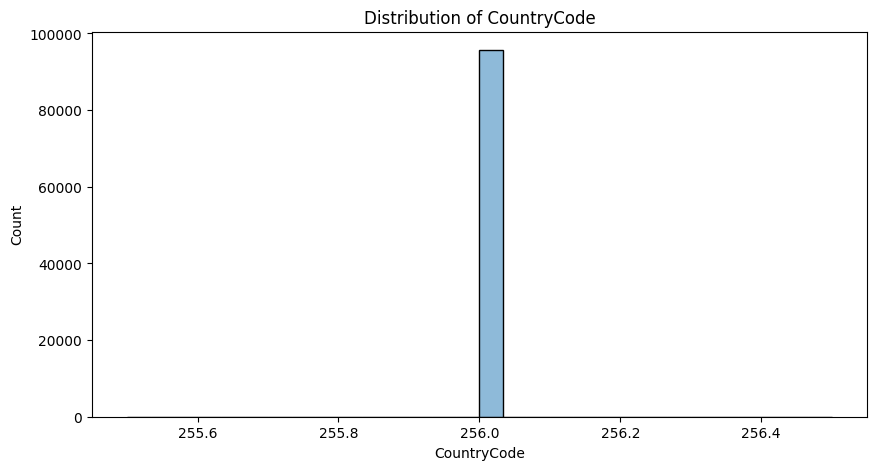

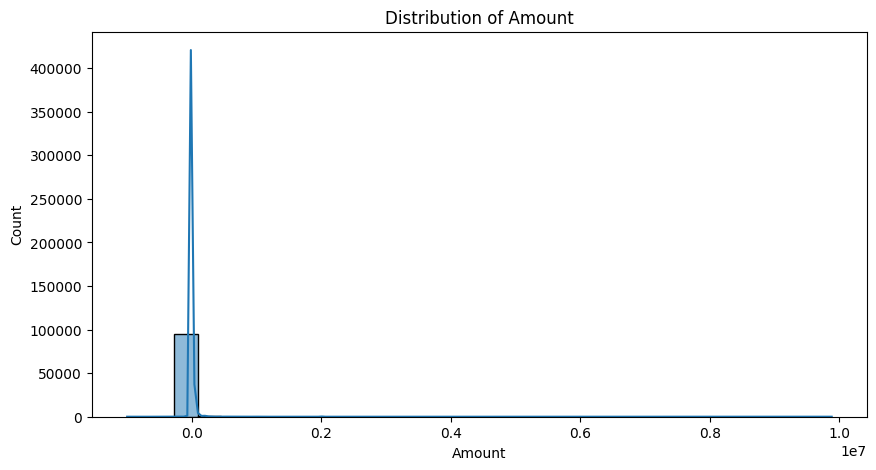

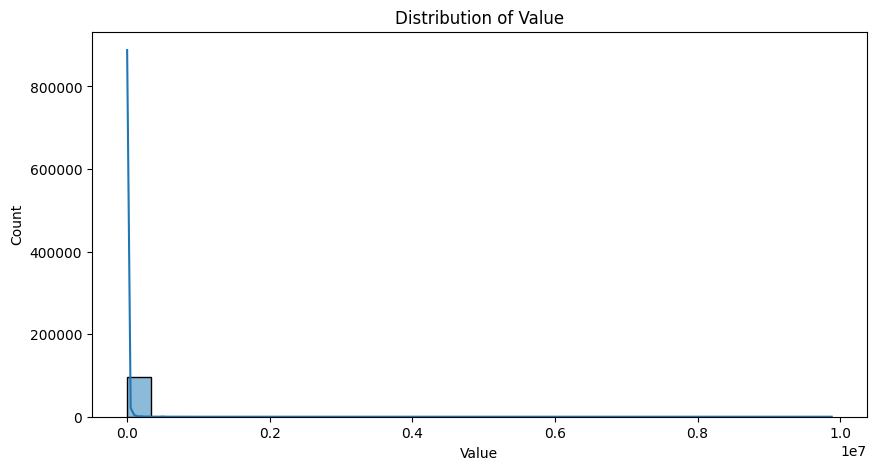

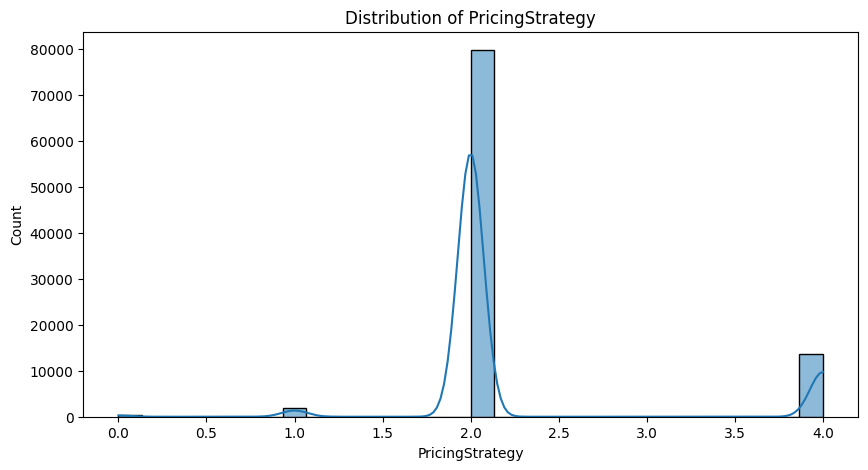

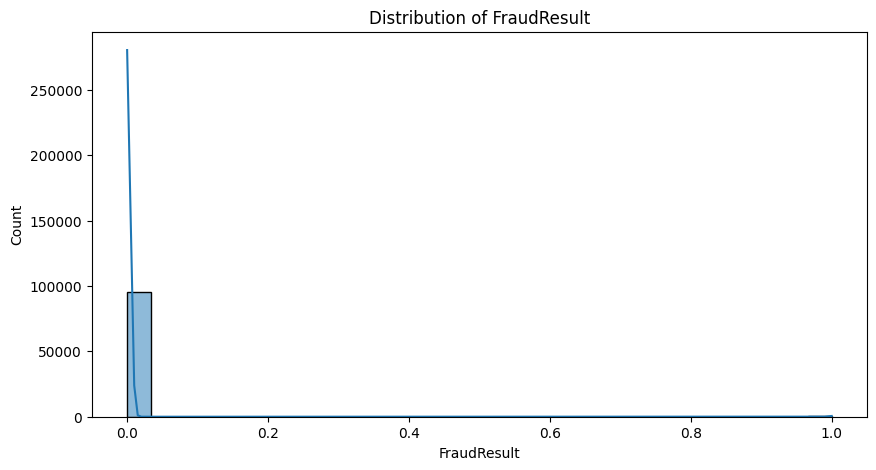

In [12]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

In [15]:
categorical_features = df.select_dtypes(include=['object']).columns
print(categorical_features)

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory',
       'ChannelId'],
      dtype='object')


In [22]:
categorical_features = categorical_features.drop(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId','ProviderId', 'ProductId','ChannelId'], errors='ignore')

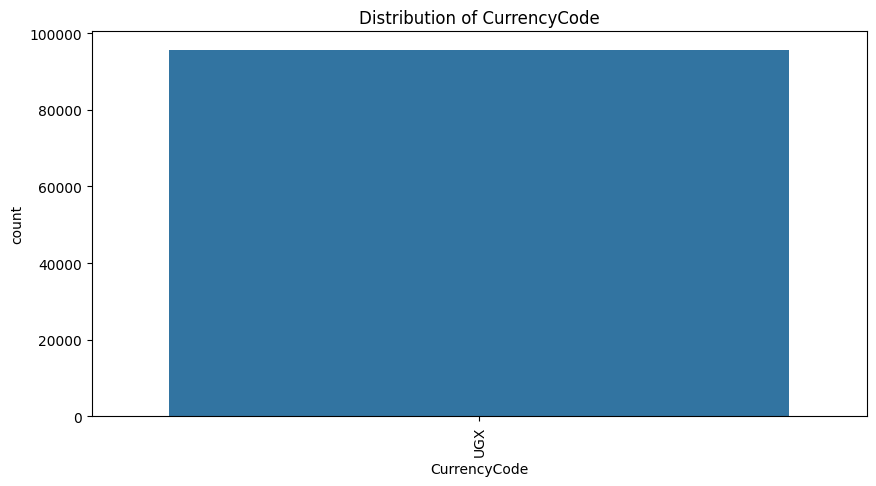

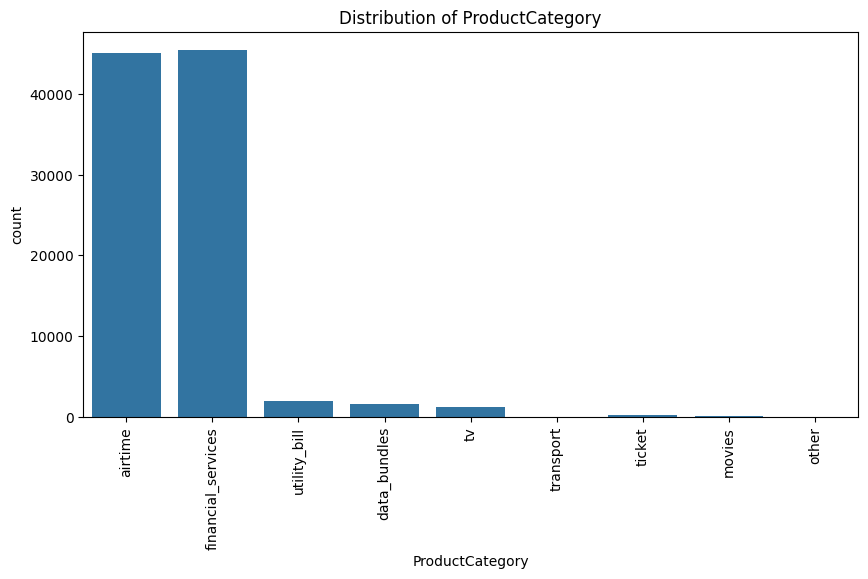

In [24]:
for column in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[column])  # Using seaborn for countplot
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.show()

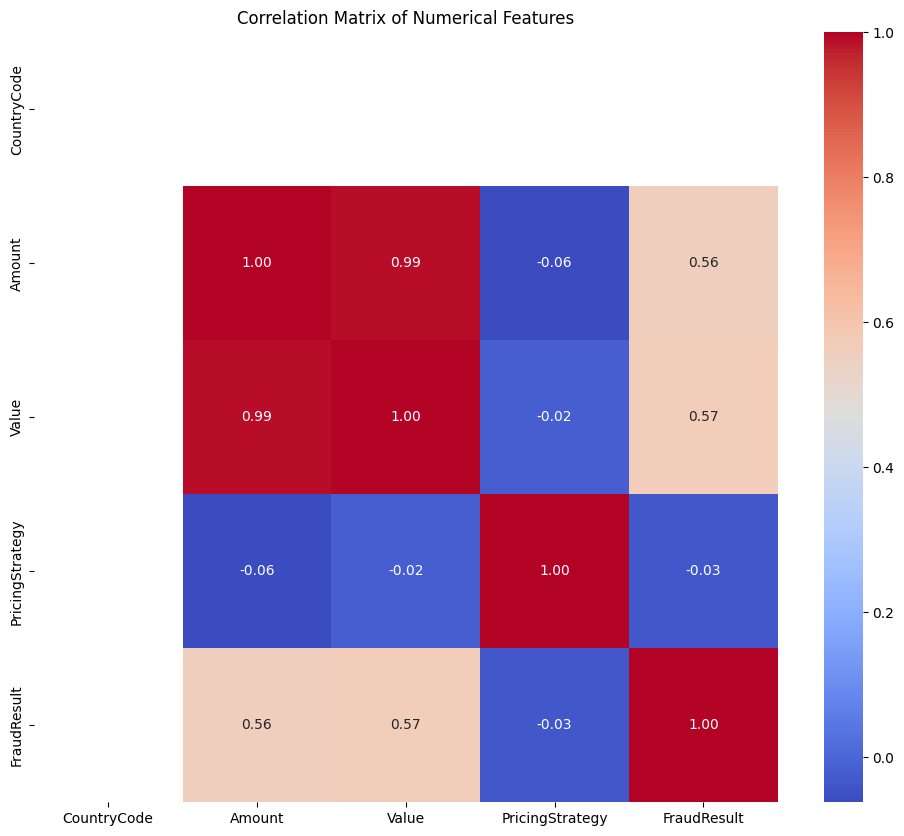

In [27]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=np.number).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

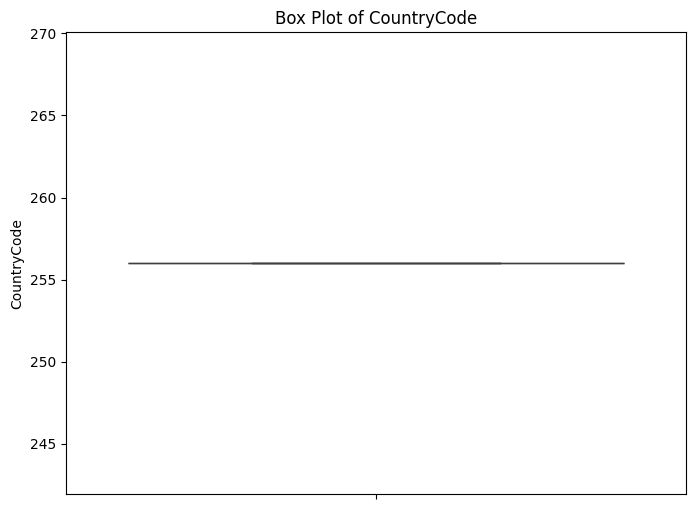

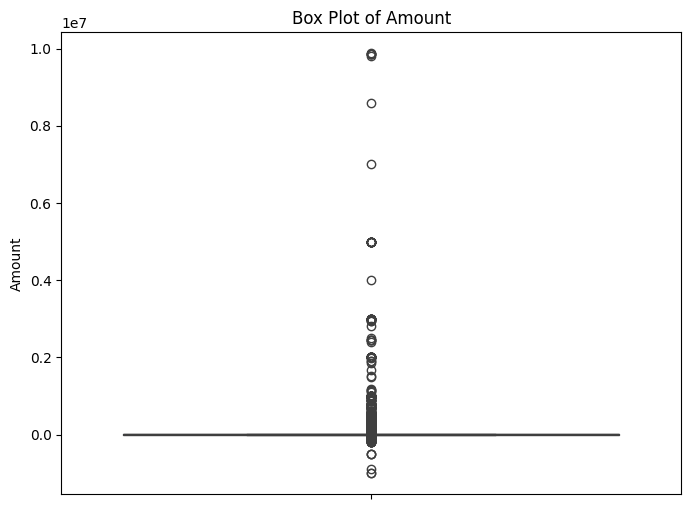

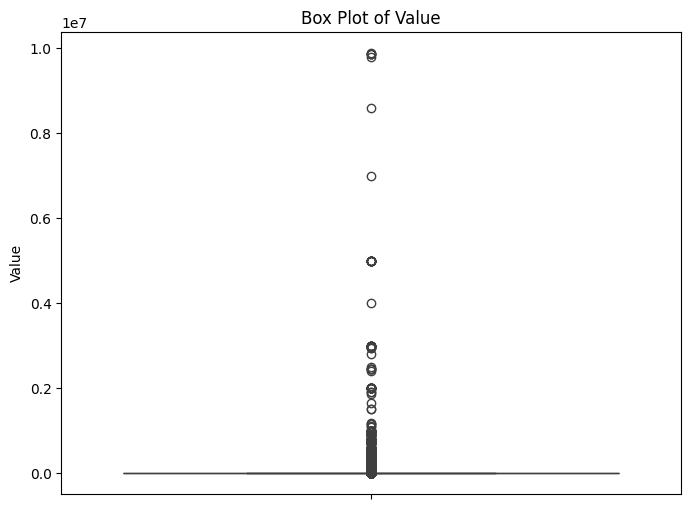

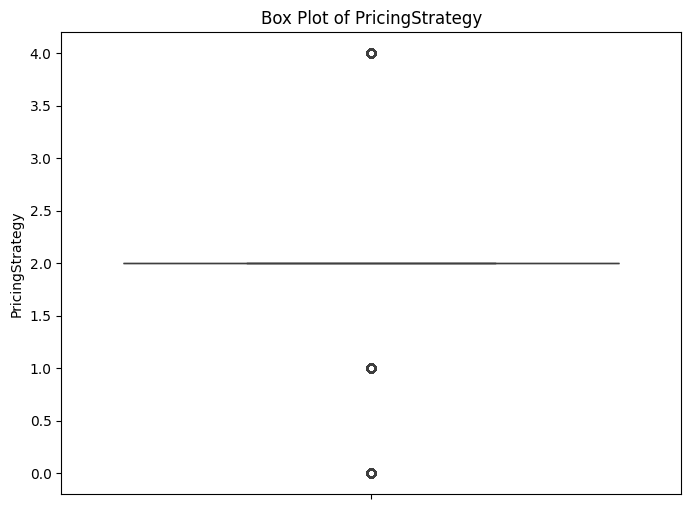

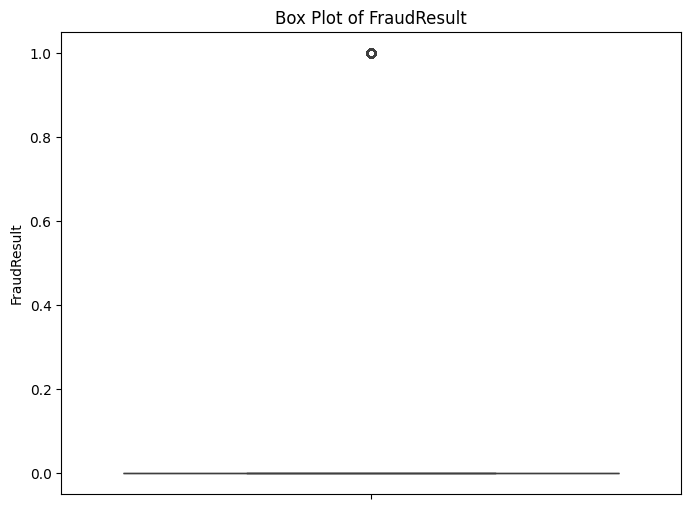

In [28]:
# Create box plots for numerical features to identify outliers
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()